In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
list_ev = []

In [4]:
df = pd.read_csv("drive/My Drive/home_train.csv")

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

##**問題1　練習のために特徴量の選択**

In [6]:
df_X = df.loc[:,["GrLivArea","YearBuilt"]]
df_y = df.loc[:,["SalePrice"]]

In [7]:
print(df_X)
print(df_y)

      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]
      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]


In [8]:
df_X.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

##**問題2　線形回帰による推定と評価**

In [9]:
X = df_X.values
y = df_y.values

In [10]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit(X)
X_std = sscaler.transform(X)

sscaler.fit(y)
y_std = sscaler.transform(y)


In [11]:
y_std

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.25)

In [ ]:
#y_test

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [16]:
model_lr = lr.fit(X_train, y_train)

In [17]:
y_pred = model_lr.predict(X_test)

In [ ]:
#y_test

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mse_lr = mean_squared_error(y_test, y_pred)
print(mse_lr)
list_ev.append(mse_lr)

0.34795449395623107


In [21]:
X_train

array([[ 0.33606733,  1.24971825],
       [-0.79471423, -0.53880191],
       [ 0.7701047 , -0.43943967],
       ...,
       [ 1.13751352,  0.78602784],
       [-1.00411822, -0.70440562],
       [ 0.64636598, -0.57192265]])

In [22]:
X_test[:,0].shape
y_pred.shape

(365, 1)

##**GrLivArea　と　価格の関係性**

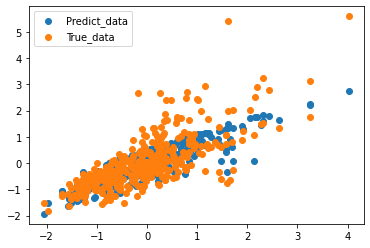

In [23]:

plt.scatter(X_test[:,0], y_pred, label="Predict_data")
plt.scatter(X_test[:,0], y_test, label="True_data")
plt.legend()

##**YearBuilt　と　価格の関係**

予測データ

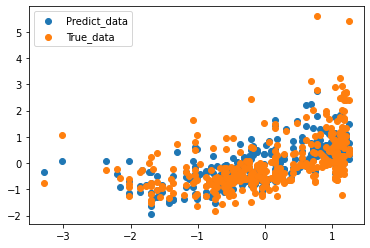

In [24]:
plt.scatter(X_test[:,1], y_pred, label="Predict_data")
plt.scatter(X_test[:,1], y_test, label="True_data")
plt.legend()

##**問題3　手法の比較**

In [25]:
from sklearn.svm import SVR

svm = SVR()
model_svm = svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
list_ev.append(mse_svm)
mse_svm


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.30910105327063103

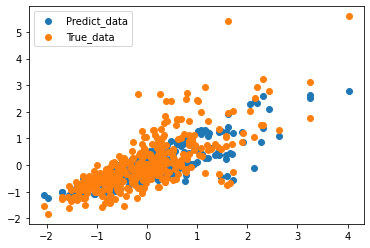

In [26]:
plt.scatter(X_test[:,0], y_pred_svm, label="Predict_data")
plt.scatter(X_test[:,0], y_test, label="True_data")
plt.legend()

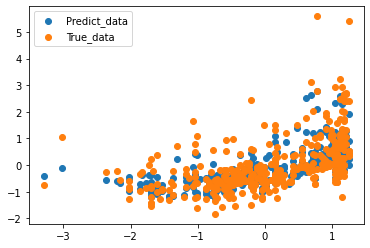

In [27]:
plt.scatter(X_test[:,1], y_pred_svm, label="Predict_data")
plt.scatter(X_test[:,1], y_test, label="True_data")
plt.legend()

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
model_tree = tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
list_ev.append(mse_tree)
mse_tree

0.43362061256906576

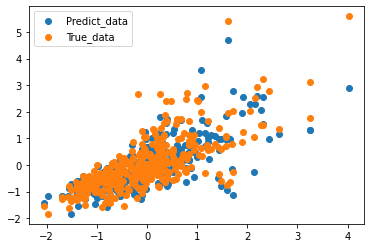

In [29]:
plt.scatter(X_test[:,0], y_pred_tree, label="Predict_data")
plt.scatter(X_test[:,0], y_test, label="True_data")
plt.legend()

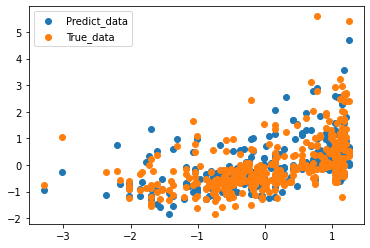

In [30]:
plt.scatter(X_test[:,1], y_pred_tree, label="Predict_data")
plt.scatter(X_test[:,1], y_test, label="True_data")
plt.legend()

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model_rfr = rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
list_ev.append(mse_rfr)
mse_rfr


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.28509301826800015

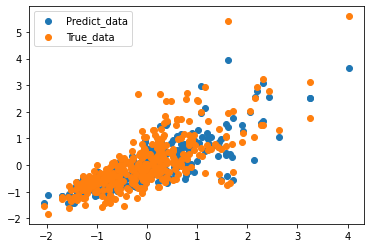

In [32]:
plt.scatter(X_test[:,0], y_pred_rfr, label="Predict_data")
plt.scatter(X_test[:,0], y_test, label="True_data")
plt.legend()

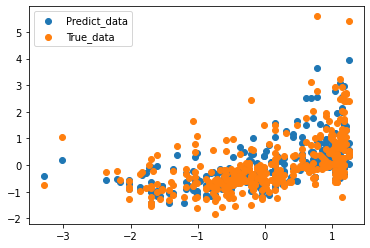

In [33]:
plt.scatter(X_test[:,1], y_pred_rfr, label="Predict_data")
plt.scatter(X_test[:,1], y_test, label="True_data")
plt.legend()

In [34]:
print(list_ev)

[0.34795449395623107, 0.30910105327063103, 0.43362061256906576, 0.28509301826800015]


<BarContainer object of 4 artists>

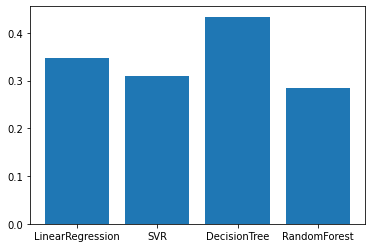

In [35]:
xlabel = ["LinearRegression","SVR","DecisionTree","RandomForest"]
plt.bar(xlabel, list_ev)

##**考察**<br>

回帰問題では分類問題で精度がよかったモデルよりも決定木による評価の方が高かった。<br>
決定木は特にGrLivAreaと価格の関係性からの推測がまとまっており、大きく外れている数値がなかった。<br>
決定木は解析対象のデータの分布を仮定しないノンパラメトリックな手法であること。ランダムフォレストはパラメータの調整が不可欠なため、今回精度が低かったと思われる。

##**問題4　他の特徴量も使用しての学習**

Week3で行った相関関係が高いデータを用いるのが良いと思われる。今回はOverallQualを学習データに追加する

In [36]:
list_ev2 = []

In [37]:
df_X2 = df.loc[:,["GrLivArea","YearBuilt","OverallQual"]]
df_y2 = df.loc[:,["SalePrice"]]

In [38]:
X2 = df_X2.values
y2 = df_y2.values

In [39]:
sscaler = StandardScaler()
sscaler.fit(X2)
X2_std = sscaler.transform(X2)

sscaler.fit(y2)
y2_std = sscaler.transform(y2)


In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_std, y2_std, test_size=0.25)

In [41]:
model_lr2 = lr.fit(X_train2, y_train2)
y_pred_lr2 = model_lr2.predict(X_test2)
mse_lr2 = mean_squared_error(y_test2, y_pred_lr2)
list_ev2.append(mse_lr2)

In [42]:
model_svm2 = svm.fit(X_train2, y_train2)
y_pred_svm2 = model_svm2.predict(X_test2)
mse_svm2 = mean_squared_error(y_test2, y_pred_svm2)
list_ev2.append(mse_svm2)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
model_tree2 = tree.fit(X_train2, y_train2)
y_pred_tree2 = model_tree2.predict(X_test2)
mse_tree2 = mean_squared_error(y_test2, y_pred_tree2)
list_ev2.append(mse_tree2)

In [44]:
model_rfr2 = rfr.fit(X_train2, y_train2)
y_pred_rfr2 = model_rfr2.predict(X_test2)
mse_rfr2 = mean_squared_error(y_test2, y_pred_rfr2)
list_ev2.append(mse_rfr2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


<BarContainer object of 4 artists>

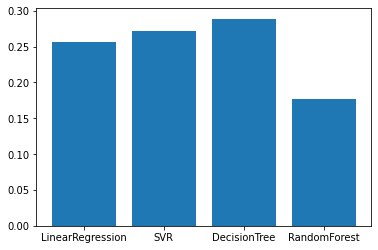

In [45]:
xlabel = ["LinearRegression","SVR","DecisionTree","RandomForest"]
plt.bar(xlabel, list_ev2)

特徴量を増やすと検証事項が増える影響か総じて評価が下がる<br>
パラメータの調整などがより重要になってくると思われる。